### Region-Based Segmentation (Watershed Algorithm)
#### Theory
The Watershed Algorithm is a region-based segmentation technique that treats the grayscale image as a topographic surface. In this surface, the intensity values represent the height of the terrain. The algorithm identifies catchment basins and watershed lines, which correspond to regions and boundaries in the image.

#### Steps in the Workflow:
1. **Thresholding**: The input image is binarized using Otsu's thresholding method to separate foreground objects from the background.
2. **Morphological Operations**: Small objects are removed, and the binary image is refined using morphological operations like closing.
3. **Distance Transform**: A distance transform is applied to compute the Euclidean distance from each foreground pixel to the nearest background pixel.
4. **Local Maxima Detection**: Peaks in the distance transform are identified as markers for the watershed algorithm.
5. **Watershed Segmentation**: The markers are used to segment the image into distinct regions using the watershed algorithm.

This approach is particularly useful for segmenting overlapping objects in an image, as it effectively separates connected components based on their topological features.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.morphology import remove_small_objects, closing, square
from skimage.measure import label
import cv2

In [ ]:
def apply_threshold(image):
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary


def watershed_segmentation(binary_img):
    binary_img = closing(binary_img, np.ones((3, 3), dtype=bool))
    cleaned = remove_small_objects(binary_img, min_size=30)
    distance = ndi.distance_transform_edt(cleaned)
    coords = peak_local_max(distance, labels=cleaned, footprint=np.ones((3, 3)))

    local_maxi = np.zeros_like(distance, dtype=bool)
    local_maxi[tuple(coords.T)] = True

    markers = label(local_maxi)
    labels_ws = watershed(-distance, markers, mask=cleaned)

    return labels_ws

In [ ]:
image = cv2.imread("stdimgs/objects.jpeg", cv2.IMREAD_GRAYSCALE)
binary_img = apply_threshold(image)
labels_ws = watershed_segmentation(binary_img)

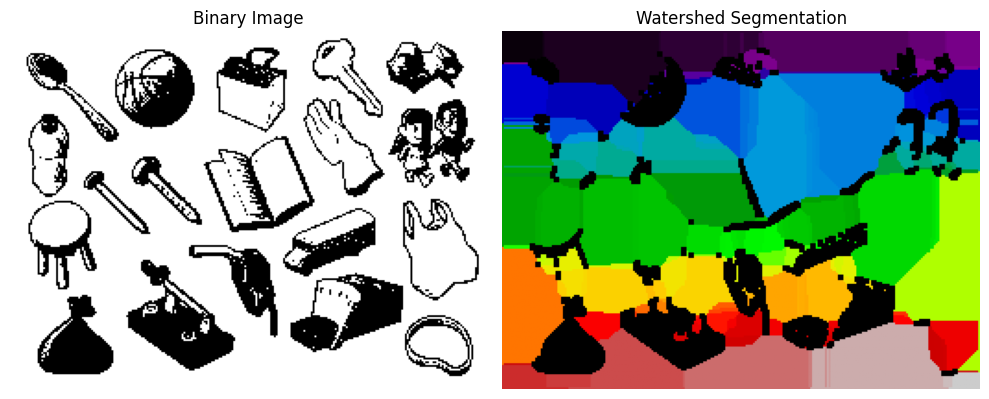

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap="gray")
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(labels_ws, cmap="nipy_spectral")
plt.title("Watershed Segmentation")
plt.axis("off")
plt.tight_layout()